<a href="https://colab.research.google.com/github/dhara-parikh/The_Sparks_Foundation/blob/main/Task2_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="crimson"><center><h1 style='font-size:200; font-weight:bold'> Grip At the Sparks Foundation</h1></center></font>



<font color='blue'><h3 style="color:#0066cc">Name : Dhara BharatKumar Parikh <h3></font>





 # Task 2 --> Prediction using Unsupervised Learning


<h3>Dataset</h3>
<ul>
    <li>sepal length</li>
    <li>sepal width</li>
    <li>petal length</li>
    <li>petal width</li>
</ul>


Aim - To Predict optimum number of clusters and represent visually

## Importing all libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn import datasets

## Reading Data from link

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis

All the sepal length, sepal width petal length, petal width are given in cm but we'll remove (cm) from the column name for better readability

In [ ]:
iris_df.rename(columns={'sepal length (cm)':'sepal length', 'sepal width (cm)':'sepal width',
                       'petal length (cm)':'petal length', 'petal width (cm)':'petal width'}, inplace=True)
iris_df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
print("Keys of Iris Dataset :\n {}".format(iris_df.keys()))

Keys of Iris Dataset :
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We need to see the features are of which datatyee and for the same we can use info function. We can see that all features are of float type except Species features

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


To build models, Null values are not allowed. So, it is always important to see how many samples have null values.

In [ ]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Now, we will see that how these features are corelated using heatmap in seaborn library. 
We can see that petal length and petal width are highly corelated.

<AxesSubplot:>

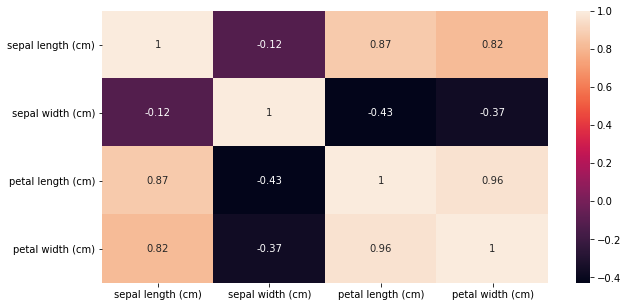

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(iris_df.corr(), annot=True)

## Run Cluster Anaalysis 10 times 

We run the cluster analysis using Cluster as till 1 to 10. Also, we store the WSS Score. The WSS score will be used to plot the elbow plot 

WSS = Within-Cluster-Sum of Squared

In [ ]:
from sklearn.cluster import KMeans

K = range(1, 11)
wcss = []
for k in K:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(iris_df)
    wcss_iter = km.inertia_
    wcss.append(wcss_iter)

In [ ]:
mycenters = pd.DataFrame({'Cluster':K, 'WCSS':wcss})
mycenters

,Cluster,WCSS
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182
5,6,39.039987
6,7,34.298230
7,8,30.234377
8,9,27.983391
9,10,26.337433


plt.plot(range(1,11), wcss)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

## Plotting Elbow Curve

Text(0, 0.5, 'WCSS')

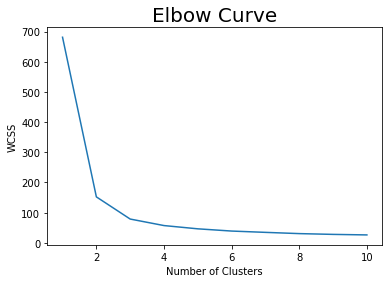

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

We can clearly see that why it is called elbow methos. The optimum cluster is where the elbow occurs. This is when the within-Cluster-Sum-of-Squared decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 150, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualization

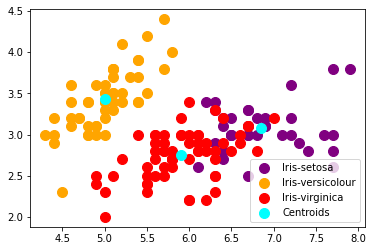

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='purple', label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='orange', label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='red', label='Iris-virginica')

# plotting the centroid of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.legend()

# Conclusion - This concludes that there are 3 Clusters available in the Iris Dataset.